In [ ]:
""" This cell is to show you how the integrated environment works."""

from env_opp_integrated import Env
import random

# Initialize environment, here you can specify either 'minimax' or 'random'
test_env = Env(opponent_type='minimax', minimax_depth=3, minimax_epsilon=0)
test_env.render_console()

# Here you can see that the player (agent) only observes states after the opponent has played
while test_env.finished == -1:
    action = random.randint(0, 6)
    test_env.step(action=action)
    test_env.render_console()

In [1]:
#%reload_ext dotenv
#%dotenv

# ML libraries
import torch
import torch.nn as nn

# Local imports
from env_opp_integrated import Env
from trainer_opp_integrated import Trainer
import utils
# Training Agents
from agents.cql_agent import CQLAgent
from agents.deep_q_agent import DeepQAgent
from agents.deep_q_agent_double_q import DDQAgent
# Non-Training Agents
from agents.minimax_agent import MinimaxAgent
from agents.random_agent import RandomAgent

In [2]:
##################
# INITIALIZATION #
##################

# Tweek these parameters for training and evaluation
num_episodes = {'TRAIN': 5000, 'EVAL': 100}
with_options = False
opponent_type = 'minimax'       # minimax, random
minimax_depth = 1
minimax_epsilon = 0.1
# Agent
agent_type = 'CQLAgent'         # DDQAgent, DeepQAgent, CQLAgent
network_type = 'CNN'            # CNN, FCNN
epsilon_max = 1
epsilon_min = 0.01
epsilon_decay = 0.9999

# Fix random seed
utils.seed_everything(42, deterministic=False)

# Use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Define game environment, this should be passed to the agents and the trainer
env = Env(opponent_type=opponent_type, minimax_depth=minimax_depth, minimax_epsilon=minimax_epsilon)

# Define agent
if agent_type == 'DDQAgent':
    agent = DDQAgent(env=env, epsilon_max=epsilon_max, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, network_type=network_type, device=device)
elif agent_type == 'DeepQAgent':
    agent = DeepQAgent(env=env, epsilon_max=epsilon_max, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, network_type=network_type, device=device)
elif agent_type == 'CQLAgent':
    agent = CQLAgent(env=env, epsilon_max=epsilon_max, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, network_type=network_type, device=device)
else:
    raise ValueError(f"Unknown agent_type: {agent_type}")

# Define options for training
replacement_agent = None
options = {
           'UPDATE_OPPONENT': True,                         # Whether to enable self-play or not
           'OPPONENT_UPDATE_FREQUENCY': 100,                # After how many episodes the opponent will be replaced by the current agent
           'BOOTSTRAP_EPISODES': 7500,                      # During this time, the agent will not be replaced by itself
           'DECAY_RANDOMNESS_OPPONENT': True,               # Decay randomness of the opponent. Use only if the opponent acts with some randomness
           'DECAY_RANDOMNESS_FREQUENCY': 1000,              # Frequency of randomness decay
           'REPLACE_FOR_EVALUATION': True,                  # Whether to replace the training model at the end with another evaluation model
           'REPLACE_FOR_EVALUATION_BY': replacement_agent,  # Evalutation model to replace training model by
           'AUTOSAVE': True,                                # Whether to save the model at certain intervals
           'AUTOSAVE_TYPE': 'NUM_EPISODES',                 # One of ["NUM_OPTIMIZATIONS", "NUM_EPISODES"]
           'AUTOSAVE_PERIOD': 1000,                         # After how many _ to save the model
           }
if not with_options: options = None

# Initialize trainer
# NOTE: You don't need to specify the player ids, it is assumed to be fixed (Playing Agent has ID 1, Minimax/Random has ID 2)
trainer = Trainer(env=env, agent=agent, num_episodes=num_episodes, device=device, verbose=True, options=options)

TRAIN: Running episode 5000 of 5000. Agent won 1114 times. Current win ratio of AGENT is 22.28%. Agent Parameters: Epsilon = 0.139332, Memory Size = 10000
TRAIN: Average turns per episode 3.9822
TRAIN: Average invalid moves per episode 0.0


Plotting Episode rewards and steps...


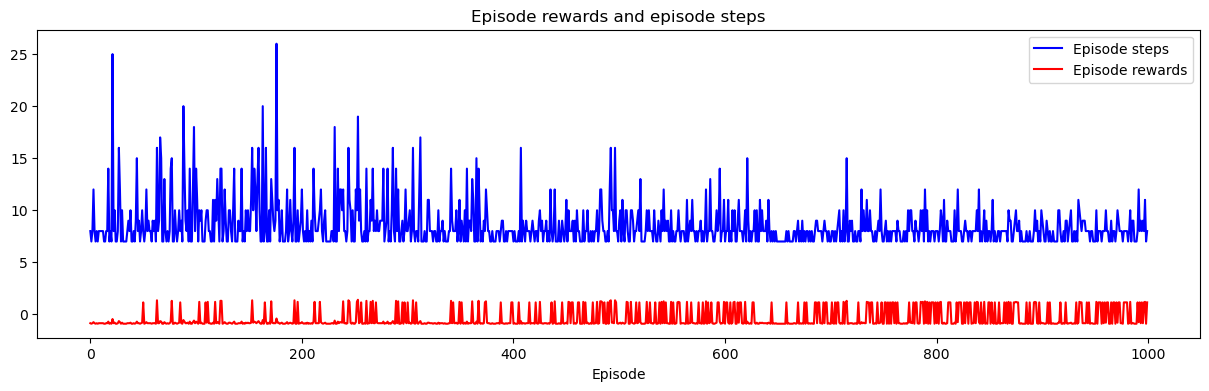

Model was saved in ./saved_models/ as CQLAgent_CNN_19712.pt
EVAL: Running episode 100 of 100. Agent won 60 times. Current win ratio of AGENT is 60.00%. Agent Parameters: Epsilon = 0.139276, Memory Size = 10000  
EVAL: Average turns per episode 3.64
EVAL: Average invalid moves per episode 0.0


Plotting Episode rewards and steps...


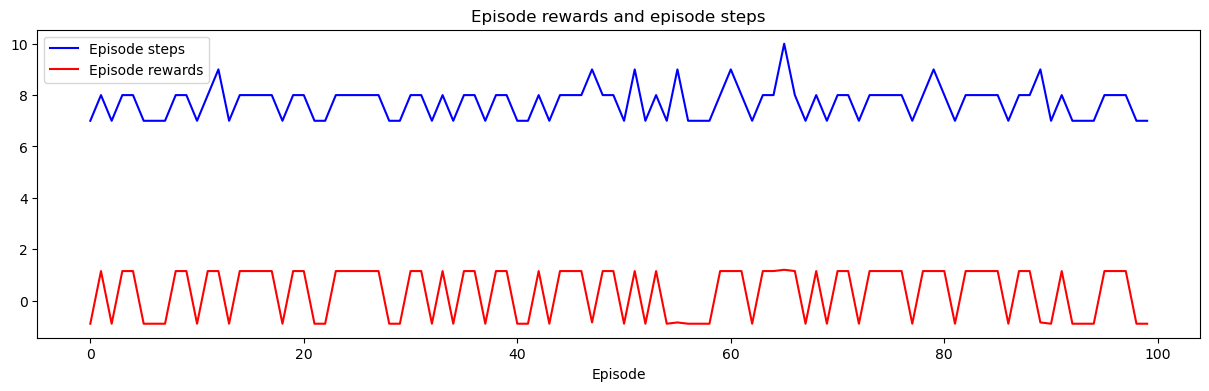

In [3]:
############
# TRAINING #
############

# Train agent
trainer.train()

EVAL: Running episode 990 of 1000. Ratios are [WINS: 68.08% | LOSSES: 31.92% | TIES: 0.00%]

_______________
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|2|0|0|0|
|0|1|0|2|0|0|0|
AGENT action was 1
Reward was 0.05


_______________
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|2|0|0|0|
|0|1|0|2|0|0|0|
|0|1|0|2|0|0|0|
AGENT action was 1
Reward was 0.05


_______________
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|2|0|0|0|
|0|1|0|2|0|0|0|
|0|1|0|2|0|0|0|
|0|1|0|2|0|0|0|
AGENT action was 1
Reward was -1
EVAL: Running episode 991 of 1000. Ratios are [WINS: 68.01% | LOSSES: 31.99% | TIES: 0.00%]

_______________
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|1|2|0|0|0|0|
AGENT action was 1
Reward was 0.05


_______________
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|1|0|0|0|0|0|
|0|1|2|2|0|0|0|
AGENT action was 1
Reward was 0.05


_______________
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|0|0|0|0|0|0|
|0|1|0|0|

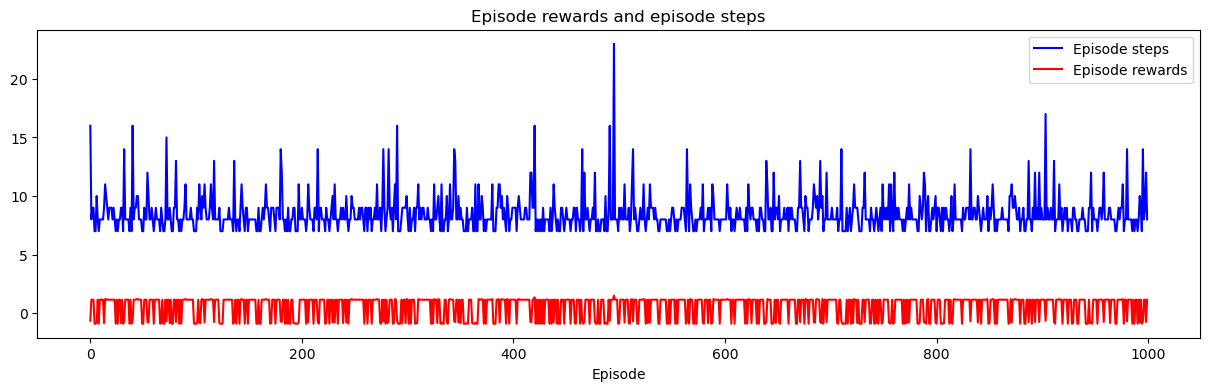

In [4]:
####################
# QUICK EVALUATION #
####################

# Tweek these parameters for evaluation
episodes = 1000
opponent_type = 'minimax'
minimax_depth = 1
minimax_epsilon = 0.4
# Agent
agent_type = 'CQLAgent'     # DDQAgent, DeepQAgent, CQLAgent
network_type = 'CNN'        # CNN, FCNN
epsilon_max = 1
epsilon_min = 0.01
epsilon_decay = 0.9999

# Fix random seed
utils.seed_everything(42, deterministic=False)

# Use GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

eval_env = Env(opponent_type=opponent_type, minimax_depth=minimax_depth, minimax_epsilon=minimax_epsilon)

# Load agent from save and set to eval mode
if agent_type == 'DDQAgent':
    agent = DDQAgent(env=eval_env, epsilon_max=epsilon_max, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, network_type=network_type, device=device)
elif agent_type == 'DeepQAgent':
    agent = DeepQAgent(env=eval_env, epsilon_max=epsilon_max, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, network_type=network_type, device=device)
elif agent_type == 'CQLAgent':
    agent = CQLAgent(env=eval_env, epsilon_max=epsilon_max, epsilon_min=epsilon_min, epsilon_decay=epsilon_decay, network_type=network_type, device=device)
else:
    raise ValueError(f"Unknown agent_type: {agent_type}")

# Load pretrained model
agent.load_model('./saved_models/CQLAgent_CNN_184339_stacking_champ.pt')

# Initialize trainer
trainer = Trainer(env=eval_env, agent=agent, device=device, verbose=True)
# Run evaluation
trainer.eval(agent=agent, episodes=episodes, agent_start=None, print_last_n_games=10)